# Bài 1: Sử dụng Numpy xây dựng phương pháp hồi quy tuyến tính và tiến hành huấn luyện trên bộ dữ liệu Forest FiresFires
-Đầu tiên tiến hành tiền xử lý bộ dữ liệu đề bài cho
-Sau đó tính hệ số hồi quyquy theo công thức
-Kiểm tra chất lượng mô hình bằng Mean Squared Error  (MSE), nếu MSE quá lớn thì mô hình cần cải thiện.
=> kết quả: hệ số hồi quy, mse

In [35]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"C:\Users\Hp X2 G3\Downloads\ds102\lab1\forest+fires\forestfires.csv")

# Chuyển dữ liệu phân loại (month, day) thành dạng số
df['month'] = df['month'].astype('category').cat.codes
df['day'] = df['day'].astype('category').cat.codes

# Tách thành X(features) vaf Y(target)
X = df.drop(columns=['area'])
y = df['area'].values.reshape(-1, 1)

# Thêm hệ số chặn
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Tính theta theo công thức đề bài cho
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 
print (theta)

# Dự đoán & đánh giá mô hình
y_pred = X_b @ theta
mse = np.mean((y - y_pred) ** 2)
print('mse:', mse)

[[-11.5005719 ]
 [  1.88124305]
 [  0.52679701]
 [  0.97328461]
 [  0.49952683]
 [ -0.10739595]
 [  0.10979519]
 [ -0.01462744]
 [ -0.6108142 ]
 [  0.98013486]
 [ -0.18491854]
 [  1.78229487]
 [ -3.25170999]]
mse: 3944.2368833708115


# Bài 2: Chuẩn hóa dữ liệu 
- Dùng StandardScarler (mean = 0, variance = 1)
- Tính lại hệ số hôif quy (đã chuẩn hóa)
- Tính lại mse và so sánh 

In [36]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_Scaled = Scaler.fit_transform(X)
X_b_Scaled = np.c_[np.ones((X_Scaled.shape[0], 1)), X_Scaled]

#huấn luyện lại mô hình trên dữ liệu đã được chuẩn hóahóa
theta_Scaled = np.linalg.inv(X_b_Scaled.T @ X_b_Scaled) @ X_b_Scaled.T @ y
y_pred_Scaled = X_b_Scaled @ theta_Scaled
mse_Scaled = np.mean((y - y_pred_Scaled) ** 2)

print('mse sau chuẩn hóa: ', mse_Scaled)
print('Chênh lệch trước và sau chuẩn hóa: ', abs(mse-mse_Scaled))


mse sau chuẩn hóa:  3944.236883370811
Chênh lệch trước và sau chuẩn hóa:  4.547473508864641e-13


# Bài 3: Tiến hành kĩ thuật Feature Engineering, tìm ra các thuộc tính có tính colinearity. Huấn luyện lại mô hình hồi quy tuyến tính với bộ dữ liệu chỉ giữ lại các thuộc tính uncorrelated 
- kiểm tra ma trận tương quan 
- loại bỏ các cột có collinear
- huấn luyện lại mô hình & đánh giá mse

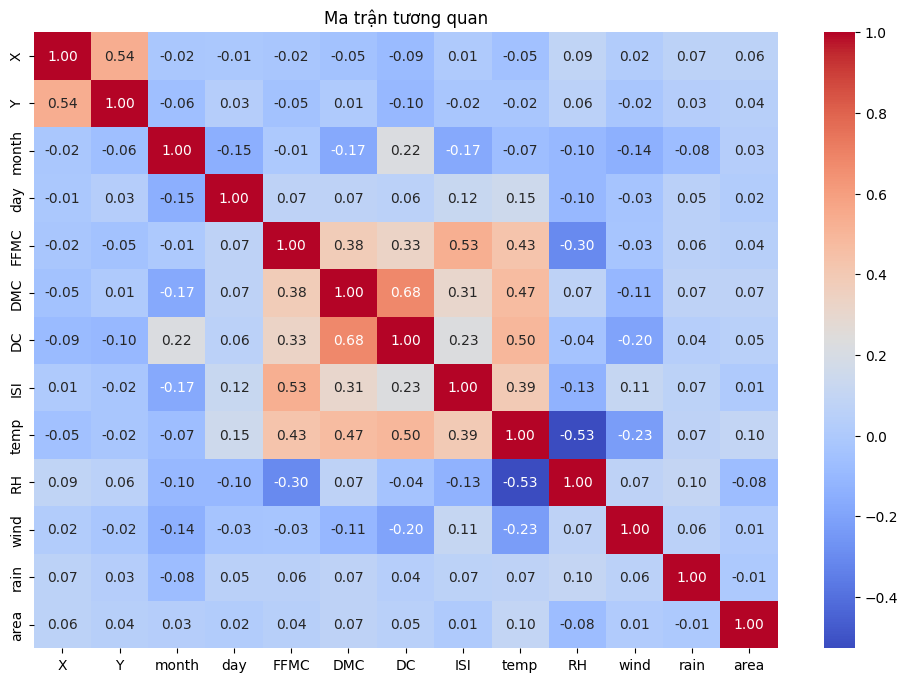

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Ma trận tương quan')
plt.show()

In [38]:
threshold = 0.8
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

X_filtered = X.drop(columns = high_corr_features)
X_b_filtered = np.c_[np.ones((X_filtered.shape[0], 1)), X_filtered]
theta_filtered = np.linalg.inv(X_b_filtered.T @ X_b_filtered) @ X_b_filtered.T @ y
y_pred_filtered = X_b_filtered @ theta_filtered
mse_filtered = np.mean((y - y_pred_filtered) ** 2)

print("MSE sau khi loại bỏ collinear:", mse_filtered)


MSE sau khi loại bỏ collinear: 3944.2368833708115


# Bài 4: Thực thi lại LR, so sánh
- dùng LinearRegression 
- dự báo y
- so sánh 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Khởi tạo mô hình LR
model = LinearRegression()

# Huấn luyện mô hình trên dữ liệu đã chuẩn hóahóa
model.fit(X_Scaled, y)

# Tiến hành dự đoám
y_sklearn_pred = model.predict(X_Scaled)

# Đánh giá mô hình bằng mse (đã nêu ở bài 2)
mse_sklearn = mean_squared_error(y, y_sklearn_pred)
print("mse của Scikit-Learn:", mse_sklearn)
print("So sánh kết quả:")
print(f"- Mô hình NumPy: {mse_Scaled}")
print(f"- Mô hình Scikit-Learn: {mse_sklearn}")

# Kiểm tra độ chính xác của hai mô hình có gần nhau không
difference = abs(mse_Scaled - mse_sklearn)
print(f"Chênh lệch giữa hai mô hình: {difference}")


mse của Scikit-Learn: 3944.236883370811
So sánh kết quả:
- Mô hình NumPy: 3944.236883370811
- Mô hình Scikit-Learn: 3944.236883370811
Chênh lệch giữa hai mô hình: 0.0


- Có thể thấy chuẩn hóa dữ liệu và loại collinear giúp cải thiện độ chính xác
- sklearn giúp huấn luyện mô hình nhanh hơn 